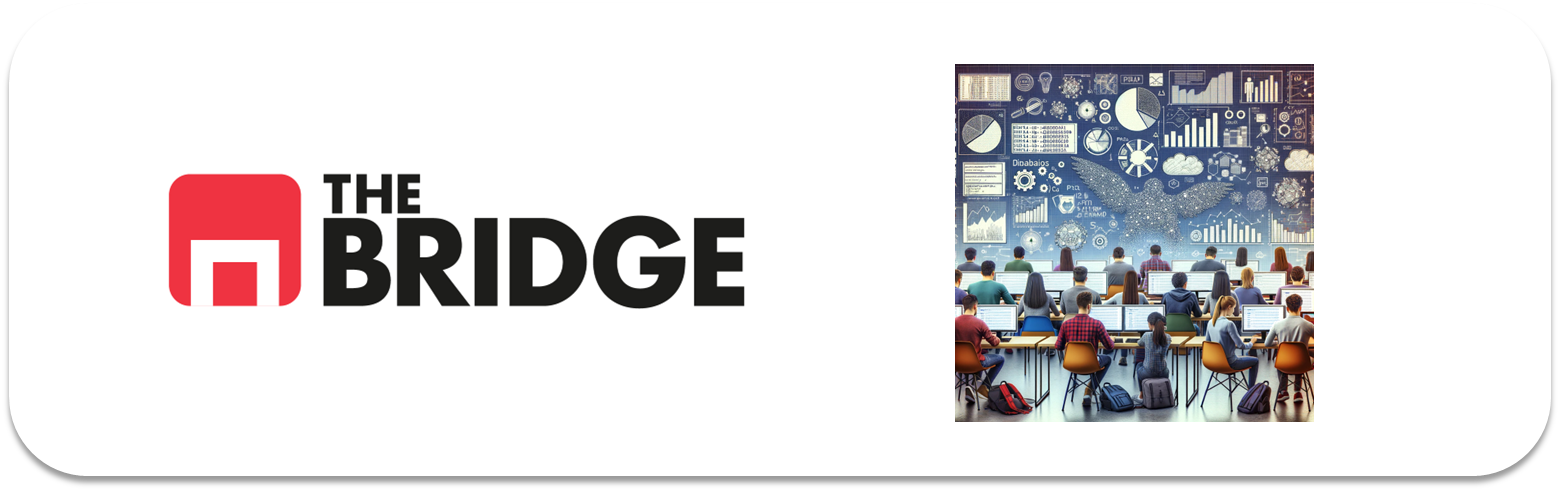

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [84]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


In [2]:
df = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv',delimiter='|')

1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
df["MEDV"].value_counts()

MEDV
50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
        ..
12.6     1
16.4     1
17.7     1
12.0     1
8.1      1
Name: count, Length: 229, dtype: int64

2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

<Axes: xlabel='MEDV', ylabel='Count'>

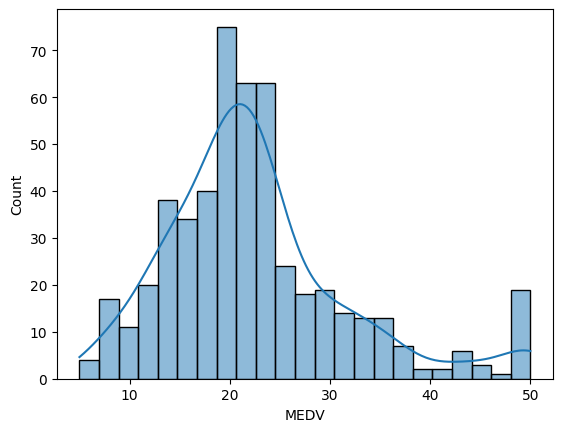

In [7]:
#Target selection
sns.histplot(df["MEDV"], kde= True)

- MEDV, parece que será la directora. Habría que aplicarle logaritmo porque tiene una larga cola aunque se asemeja a una campana normal

3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test

In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
# Feautures
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']]

# Target
y = df['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 12)
(404, 12)
(102, 12)
(404,)
(102,)


5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

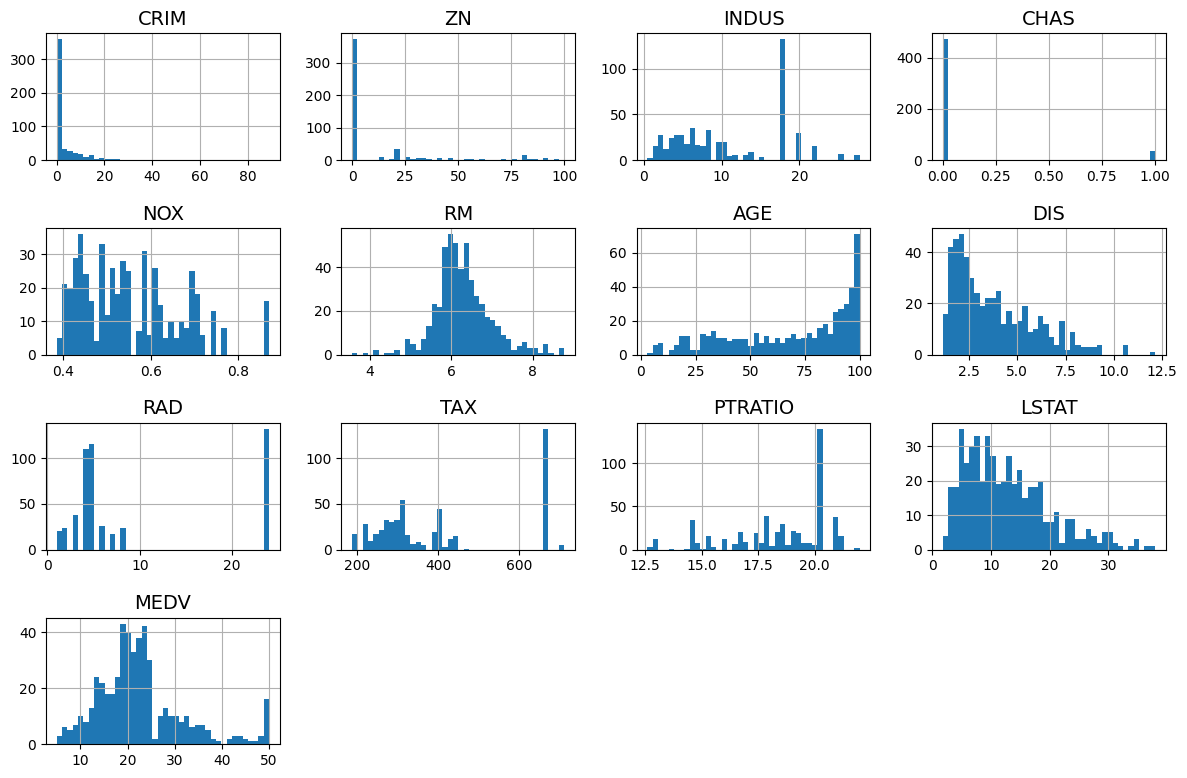

In [11]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=40, figsize=(12, 8))
plt.tight_layout()
plt.show()

- No me quedaré con todas las features
- Aplicaría más logaritmos una vez que elija las features

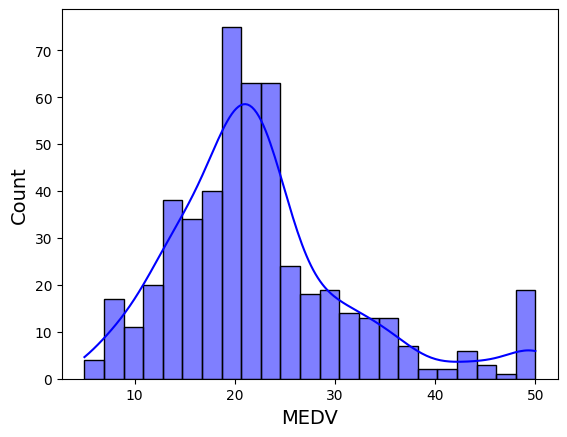

In [12]:
sns.histplot(df['MEDV'], color='Blue', kde = True)
plt.show()

In [13]:
df.corr(numeric_only= True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [14]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,23.27


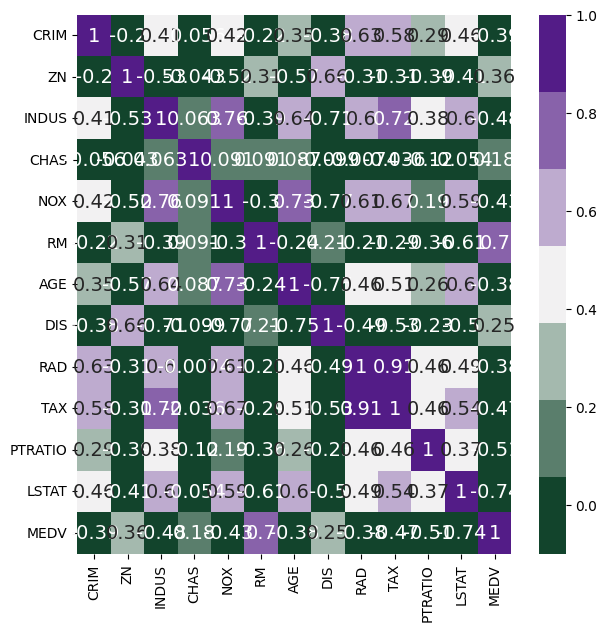

In [15]:
#Correlaciones con la targeT

plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

- No quuero añadir mucho ruido al modelo, asi que elijo como features las que mas correladas están.
- ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
- Elimino las que creo que no influyen tanto y son mas debiles

In [16]:
columnas = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']

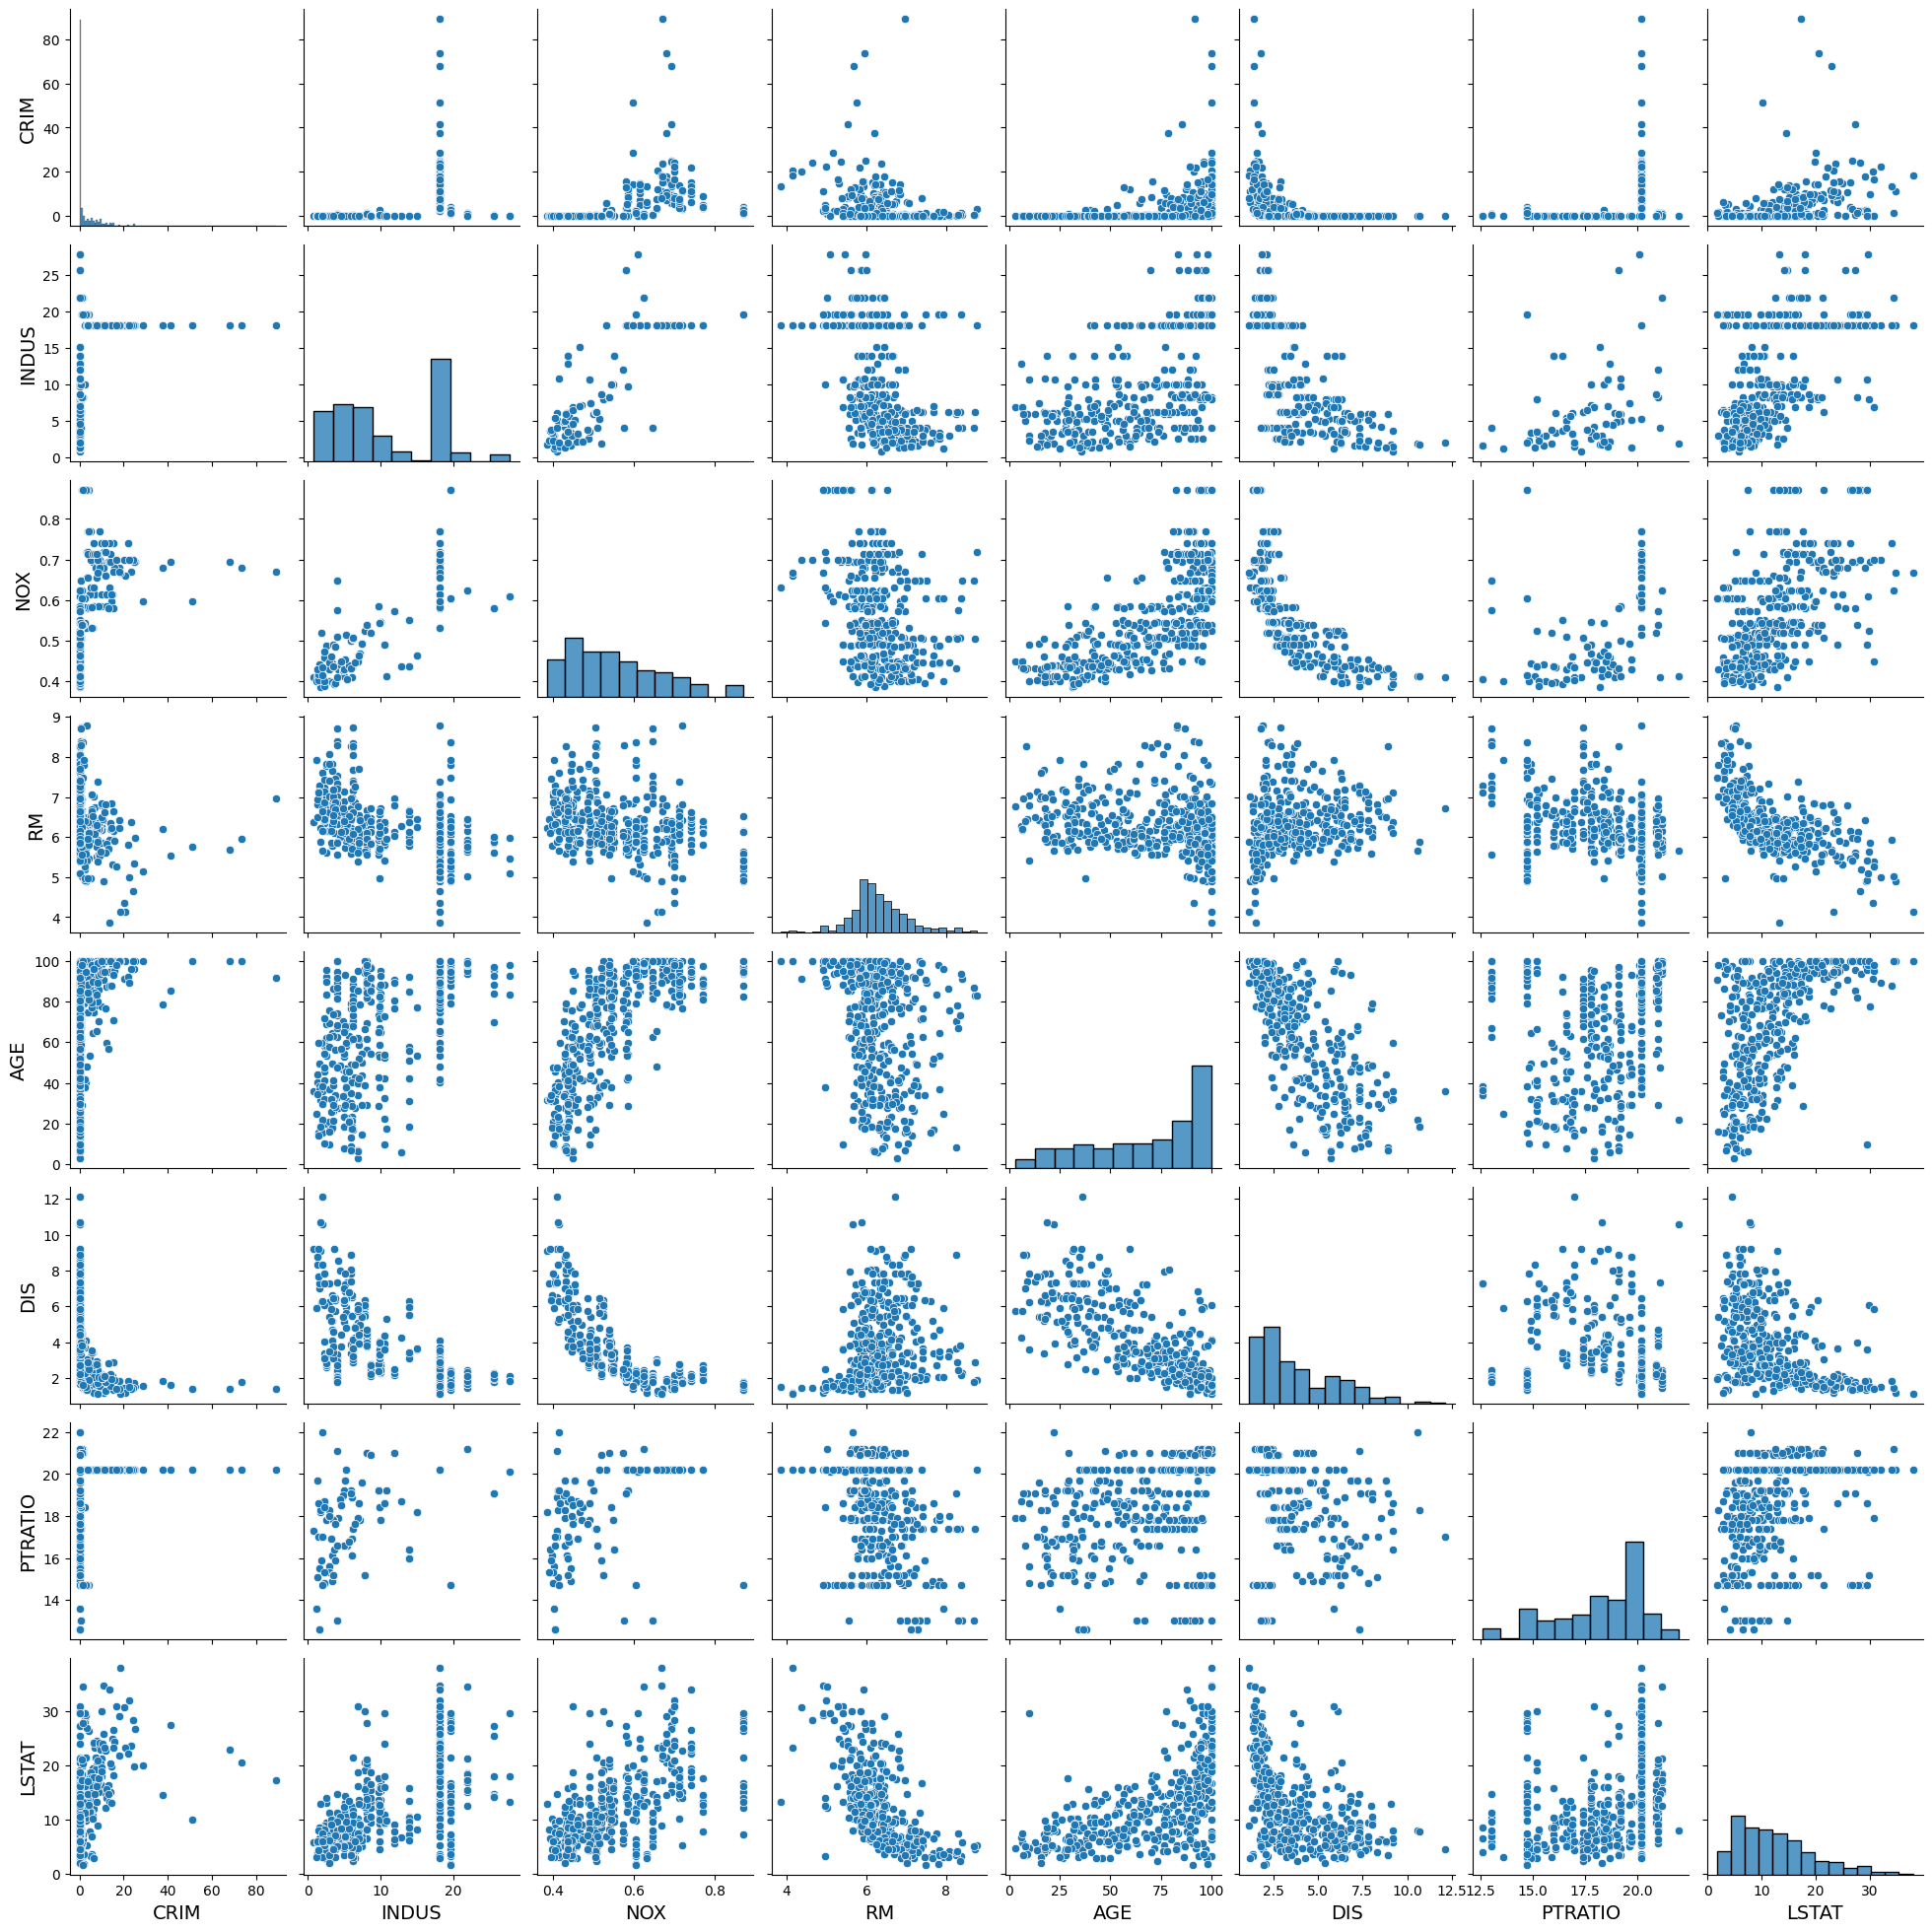

In [17]:
sns.pairplot(X_train[columnas]);

- RM es la correlación más potente

In [18]:
X_train.drop(columns=['CHAS','ZN','RAD','TAX'],inplace=True)
X_test.drop(columns=['CHAS','ZN','RAD','TAX'],inplace=True)

In [19]:
X_train

,CRIM,INDUS,NOX,RM,AGE,DIS,PTRATIO,LSTAT
477,15.02340,18.10,0.6140,5.304,97.3,2.1007,20.2,24.91
15,0.62739,8.14,0.5380,5.834,56.5,4.4986,21.0,8.47
332,0.03466,6.06,0.4379,6.031,23.3,6.6407,16.9,7.83
423,7.05042,18.10,0.6140,6.103,85.1,2.0218,20.2,23.29
19,0.72580,8.14,0.5380,5.727,69.5,3.7965,21.0,11.28
...,...,...,...,...,...,...,...,...
106,0.17120,8.56,0.5200,5.836,91.9,2.2110,20.9,18.66
270,0.29916,6.96,0.4640,5.856,42.1,4.4290,18.6,13.00
348,0.01501,2.01,0.4350,6.635,29.7,8.3440,17.0,5.99
435,11.16040,18.10,0.7400,6.629,94.6,2.1247,20.2,23.27


6. Trata las variables para que funcionen lo mejor posible en el modelo.


In [20]:
columnas

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']

array([[<Axes: title={'center': 'CRIM'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'NOX'}>],
       [<Axes: title={'center': 'RM'}>, <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>, <Axes: >]], dtype=object)

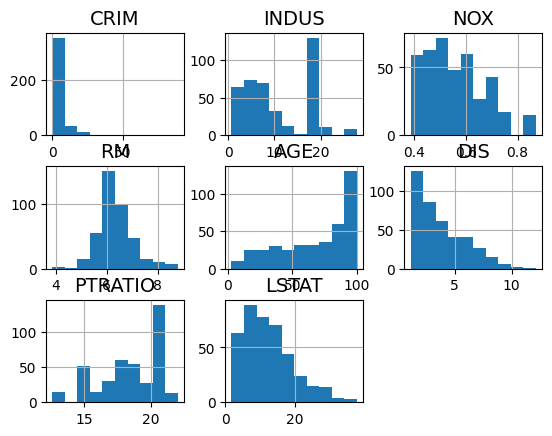

In [21]:
X_train[columnas].hist()

- Aplicamos el logaritmo para hacer mas simetrica la distribucion
- como hay valores con 0, tengo que aplicar el logp1

In [22]:
for col in columnas:
    X_train[f"log_{col}"] = np.log1p(X_train[col]) #como hay valores con 0, tengo que aplicar el logp1

array([[<Axes: title={'center': 'log_CRIM'}>,
        <Axes: title={'center': 'log_INDUS'}>,
        <Axes: title={'center': 'log_NOX'}>],
       [<Axes: title={'center': 'log_RM'}>,
        <Axes: title={'center': 'log_AGE'}>,
        <Axes: title={'center': 'log_DIS'}>],
       [<Axes: title={'center': 'log_PTRATIO'}>,
        <Axes: title={'center': 'log_LSTAT'}>, <Axes: >]], dtype=object)

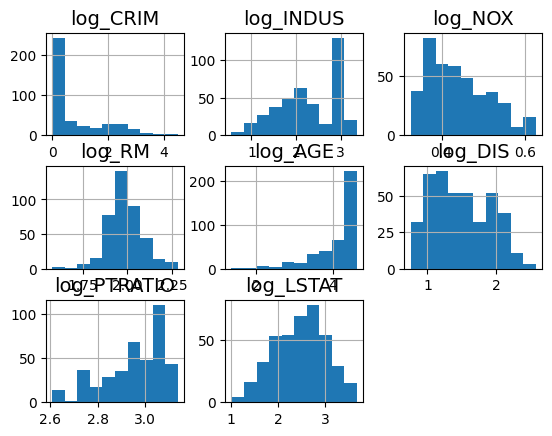

In [23]:
log_cols = [f"log_{col}" for col in columnas]
X_train[log_cols].hist()

In [24]:
X_train

,CRIM,INDUS,NOX,RM,AGE,DIS,PTRATIO,LSTAT,log_CRIM,log_INDUS,log_NOX,log_RM,log_AGE,log_DIS,log_PTRATIO,log_LSTAT
477,15.02340,18.10,0.6140,5.304,97.3,2.1007,20.2,24.91,2.774050,2.949688,0.478716,1.841184,4.588024,1.131628,3.054001,3.254629
15,0.62739,8.14,0.5380,5.834,56.5,4.4986,21.0,8.47,0.486978,2.212660,0.430483,1.921910,4.051785,1.704494,3.091042,2.248129
332,0.03466,6.06,0.4379,6.031,23.3,6.6407,16.9,7.83,0.034073,1.954445,0.363184,1.950329,3.190476,2.033489,2.884801,2.178155
423,7.05042,18.10,0.6140,6.103,85.1,2.0218,20.2,23.29,2.085724,2.949688,0.478716,1.960517,4.455509,1.105853,3.054001,3.190065
19,0.72580,8.14,0.5380,5.727,69.5,3.7965,21.0,11.28,0.545691,2.212660,0.430483,1.906129,4.255613,1.567886,3.091042,2.507972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,8.56,0.5200,5.836,91.9,2.2110,20.9,18.66,0.158029,2.257588,0.418710,1.922203,4.531524,1.166582,3.086487,2.978586
270,0.29916,6.96,0.4640,5.856,42.1,4.4290,18.6,13.00,0.261718,2.074429,0.381172,1.925124,3.763523,1.691755,2.975530,2.639057
348,0.01501,2.01,0.4350,6.635,29.7,8.3440,17.0,5.99,0.014898,1.101940,0.361165,2.032743,3.424263,2.234734,2.890372,1.944481
435,11.16040,18.10,0.7400,6.629,94.6,2.1247,20.2,23.27,2.498185,2.949688,0.553885,2.031957,4.560173,1.139338,3.054001,3.189241


In [25]:
X_train = X_train.drop(columns=columnas)

- Escalamos para estandarizar los valores

In [26]:
std_scaler = StandardScaler()
resultado_standardization = pd.DataFrame(std_scaler.fit_transform(X_train[log_cols]),columns = log_cols)
resultado_standardization.head()

,log_CRIM,log_INDUS,log_NOX,log_RM,log_AGE,log_DIS,log_PTRATIO,log_LSTAT
0,1.934774,0.996264,0.528917,-1.500093,0.807993,-0.832280,0.822894,1.473705
1,-0.316884,-0.108411,-0.124344,-0.660515,-0.103088,0.536008,1.127480,-0.392842
2,-0.762776,-0.495430,-1.035840,-0.364949,-1.566468,1.321813,-0.568420,-0.522609
3,1.257106,0.996264,0.528917,-0.258987,0.582848,-0.893844,0.822894,1.353971
4,-0.259080,-0.108411,-0.124344,-0.824641,0.243220,0.209723,1.127480,0.089035


In [27]:
resultado_standardization.describe()

,log_CRIM,log_INDUS,log_NOX,log_RM,log_AGE,log_DIS,log_PTRATIO,log_LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.099231e-17,7.914461e-17,5.770961e-16,-1.143200e-16,-8.683923e-17,2.341361e-16,-3.826972e-15,-1.011292e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-7.874414e-01,-2.594623e+00,-1.543515e+00,-4.199288e+00,-4.674823e+00,-1.729623e+00,-2.827498e+00,-2.699511e+00
25%,-7.192423e-01,-7.071398e-01,-9.036849e-01,-5.748833e-01,-4.620219e-01,-8.421793e-01,-6.144868e-01,-7.591761e-01
50%,-5.677040e-01,-4.107306e-02,-1.243438e-01,-1.034835e-01,4.301636e-01,-1.213428e-01,2.194785e-01,3.462001e-02
75%,6.171079e-01,9.962637e-01,6.708274e-01,4.945698e-01,7.437045e-01,8.988911e-01,8.228938e-01,7.323842e-01
max,3.633550e+00,1.608685e+00,2.530136e+00,3.067282e+00,8.540305e-01,2.614334e+00,1.493001e+00,2.230640e+00


In [28]:
resultado_standardization

,log_CRIM,log_INDUS,log_NOX,log_RM,log_AGE,log_DIS,log_PTRATIO,log_LSTAT
0,1.934774,0.996264,0.528917,-1.500093,0.807993,-0.832280,0.822894,1.473705
1,-0.316884,-0.108411,-0.124344,-0.660515,-0.103088,0.536008,1.127480,-0.392842
2,-0.762776,-0.495430,-1.035840,-0.364949,-1.566468,1.321813,-0.568420,-0.522609
3,1.257106,0.996264,0.528917,-0.258987,0.582848,-0.893844,0.822894,1.353971
4,-0.259080,-0.108411,-0.124344,-0.824641,0.243220,0.209723,1.127480,0.089035
...,...,...,...,...,...,...,...,...
399,-0.640739,-0.041073,-0.283790,-0.657471,0.711998,-0.748791,1.090018,0.961785
400,-0.538656,-0.315596,-0.792202,-0.627088,-0.592850,0.505582,0.177632,0.332132
401,-0.781653,-1.773185,-1.063183,0.492187,-1.169260,1.802487,-0.522610,-0.955956
402,1.663180,0.996264,1.547009,0.484011,0.760673,-0.813863,0.822894,1.352443


array([[<Axes: title={'center': 'log_CRIM'}>,
        <Axes: title={'center': 'log_INDUS'}>,
        <Axes: title={'center': 'log_NOX'}>],
       [<Axes: title={'center': 'log_RM'}>,
        <Axes: title={'center': 'log_AGE'}>,
        <Axes: title={'center': 'log_DIS'}>],
       [<Axes: title={'center': 'log_PTRATIO'}>,
        <Axes: title={'center': 'log_LSTAT'}>, <Axes: >]], dtype=object)

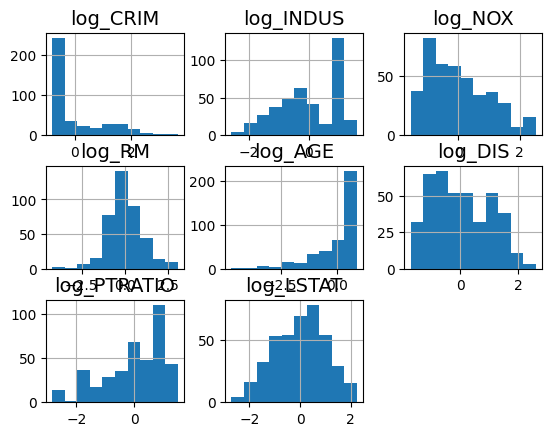

In [29]:
resultado_standardization.hist()

In [30]:
X_train_antes = X_train

In [31]:
X_train

,log_CRIM,log_INDUS,log_NOX,log_RM,log_AGE,log_DIS,log_PTRATIO,log_LSTAT
477,2.774050,2.949688,0.478716,1.841184,4.588024,1.131628,3.054001,3.254629
15,0.486978,2.212660,0.430483,1.921910,4.051785,1.704494,3.091042,2.248129
332,0.034073,1.954445,0.363184,1.950329,3.190476,2.033489,2.884801,2.178155
423,2.085724,2.949688,0.478716,1.960517,4.455509,1.105853,3.054001,3.190065
19,0.545691,2.212660,0.430483,1.906129,4.255613,1.567886,3.091042,2.507972
...,...,...,...,...,...,...,...,...
106,0.158029,2.257588,0.418710,1.922203,4.531524,1.166582,3.086487,2.978586
270,0.261718,2.074429,0.381172,1.925124,3.763523,1.691755,2.975530,2.639057
348,0.014898,1.101940,0.361165,2.032743,3.424263,2.234734,2.890372,1.944481
435,2.498185,2.949688,0.553885,2.031957,4.560173,1.139338,3.054001,3.189241


In [32]:
resultado_standardization

,log_CRIM,log_INDUS,log_NOX,log_RM,log_AGE,log_DIS,log_PTRATIO,log_LSTAT
0,1.934774,0.996264,0.528917,-1.500093,0.807993,-0.832280,0.822894,1.473705
1,-0.316884,-0.108411,-0.124344,-0.660515,-0.103088,0.536008,1.127480,-0.392842
2,-0.762776,-0.495430,-1.035840,-0.364949,-1.566468,1.321813,-0.568420,-0.522609
3,1.257106,0.996264,0.528917,-0.258987,0.582848,-0.893844,0.822894,1.353971
4,-0.259080,-0.108411,-0.124344,-0.824641,0.243220,0.209723,1.127480,0.089035
...,...,...,...,...,...,...,...,...
399,-0.640739,-0.041073,-0.283790,-0.657471,0.711998,-0.748791,1.090018,0.961785
400,-0.538656,-0.315596,-0.792202,-0.627088,-0.592850,0.505582,0.177632,0.332132
401,-0.781653,-1.773185,-1.063183,0.492187,-1.169260,1.802487,-0.522610,-0.955956
402,1.663180,0.996264,1.547009,0.484011,0.760673,-0.813863,0.822894,1.352443


In [33]:
X_train = X_train.reset_index(drop=True)
resultado_standardization = pd.DataFrame(
    resultado_standardization,
    columns=log_cols
).reset_index(drop=True)

In [34]:
X_train[log_cols] = resultado_standardization

In [35]:
X_train

,log_CRIM,log_INDUS,log_NOX,log_RM,log_AGE,log_DIS,log_PTRATIO,log_LSTAT
0,1.934774,0.996264,0.528917,-1.500093,0.807993,-0.832280,0.822894,1.473705
1,-0.316884,-0.108411,-0.124344,-0.660515,-0.103088,0.536008,1.127480,-0.392842
2,-0.762776,-0.495430,-1.035840,-0.364949,-1.566468,1.321813,-0.568420,-0.522609
3,1.257106,0.996264,0.528917,-0.258987,0.582848,-0.893844,0.822894,1.353971
4,-0.259080,-0.108411,-0.124344,-0.824641,0.243220,0.209723,1.127480,0.089035
...,...,...,...,...,...,...,...,...
399,-0.640739,-0.041073,-0.283790,-0.657471,0.711998,-0.748791,1.090018,0.961785
400,-0.538656,-0.315596,-0.792202,-0.627088,-0.592850,0.505582,0.177632,0.332132
401,-0.781653,-1.773185,-1.063183,0.492187,-1.169260,1.802487,-0.522610,-0.955956
402,1.663180,0.996264,1.547009,0.484011,0.760673,-0.813863,0.822894,1.352443


7. Construye un modelo de regresión lineal.

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


8. Analiza si lo crees conveniente los pesos y la importancia de las features.


In [38]:
lm.intercept_

np.float64(22.79653465346534)

In [39]:
lm.coef_

array([-0.78938742, -0.54473438, -1.85310482,  1.95416711,  0.28737814,
       -3.60437937, -1.65092553, -5.78006393])

In [40]:
X_train.columns

Index(['log_CRIM', 'log_INDUS', 'log_NOX', 'log_RM', 'log_AGE', 'log_DIS',
       'log_PTRATIO', 'log_LSTAT'],
      dtype='object')

In [41]:
coef_df = pd.DataFrame(lm.coef_, X_train.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
log_CRIM,-0.789387
log_INDUS,-0.544734
log_NOX,-1.853105
log_RM,1.954167
log_AGE,0.287378
log_DIS,-3.604379
log_PTRATIO,-1.650926
log_LSTAT,-5.780064


| Variable       | Coeficiente          | Importancia absoluta |
|----------------|-----------------------|------------------------|
| log_LSTAT      | -5.780063934124363    | 5.78                   |
| log_DIS        | -3.6043793704950113   | 3.60                   |
| log_NOX        | -1.853104822462095    | 1.85                   |
| log_PTRATIO    | -1.650925532824363    | 1.65                   |
| log_RM         | 1.9541671051803038    | 1.95                   |
| log_CRIM       | -0.7893874152252726   | 0.79                   |
| log_INDUS      | -0.5447343846247064   | 0.54                   |
| log_AGE        | 0.28737813904475384    | 0.29                   |

8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.


- Aplico lo mismo al dataset de Test

In [42]:
X_test_copy = X_test.copy()

In [43]:
print(type(X_test))


<class 'pandas.core.frame.DataFrame'>


In [44]:
X_test.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

In [45]:
X_train.columns

Index(['log_CRIM', 'log_INDUS', 'log_NOX', 'log_RM', 'log_AGE', 'log_DIS',
       'log_PTRATIO', 'log_LSTAT'],
      dtype='object')

In [46]:
log_cols = ['CRIM','INDUS','NOX','RM','AGE','DIS','PTRATIO','LSTAT']

for col in log_cols:
    X_test['log_' + col] = np.log1p(X_test[col])


X_test = X_test[['log_CRIM','log_INDUS','log_NOX','log_RM',
                 'log_AGE','log_DIS','log_PTRATIO','log_LSTAT']]

cols = X_test.columns

X_test_scaled = std_scaler.transform(X_test)


X_test = pd.DataFrame(X_test_scaled, columns=cols)

X_test

,log_CRIM,log_INDUS,log_NOX,log_RM,log_AGE,log_DIS,log_PTRATIO,log_LSTAT
0,-0.709871,-0.997622,-0.373190,0.189504,0.563000,-0.445140,-0.707402,-0.284451
1,-0.742266,-0.422909,-0.950395,0.658402,-1.000798,0.345753,-0.252984,-1.760359
2,-0.697363,1.608685,0.486894,-0.436195,0.833723,-1.018530,0.784015,0.905279
3,-0.709997,0.275717,-1.272434,-0.314777,-3.292203,0.856158,0.425576,-1.085040
4,0.982379,0.996264,1.335197,0.021262,0.710168,-0.634630,0.822894,0.825803
...,...,...,...,...,...,...,...,...
97,2.143675,0.996264,0.385504,-2.679808,0.854030,-1.295663,0.822894,2.050888
98,1.897034,0.996264,1.547009,0.252422,0.737411,-0.909068,0.822894,0.903333
99,1.873118,0.996264,0.385504,0.522112,0.854030,-1.320482,0.822894,1.188788
100,-0.746525,-0.872410,-0.931688,-0.388643,-0.478523,0.504790,0.135571,0.313493


In [47]:
predictions = lm.predict(X_test)
predictions

array([29.54047657, 35.71946187, 18.09989346, 26.48661519, 15.40545038,
       22.43482143, 15.7177723 , 15.59980093, 19.42177906, 20.45131497,
       19.53237755, 16.13793627,  2.67561061, 20.3763636 , 18.61857764,
       22.15016877, 18.82039498,  6.91598087, 41.89280164, 14.49935522,
       26.74162587, 28.50117675, 10.80463002, 24.87645088, 16.63644452,
       13.84580626, 22.88919979, 15.02534039, 17.52876338, 18.92225676,
       22.41035219, 25.58961599, 23.50660118, 17.98393441, 14.06371153,
       19.10414216, 34.02016634, 19.56771747, 18.6782714 , 23.93646121,
       13.78738831, 30.89919863, 42.29661747, 16.68249382, 28.28156949,
       15.02406363, 13.66013878, 25.59475094, 16.16594465, 33.52028818,
       19.14415062, 34.93913181, 14.37221346, 27.85830124, 42.73706018,
       18.86029179, 16.15505403, 34.49790745, 24.23455446, 11.49845333,
       20.4901266 , 30.11258106, 34.68014506, 17.08844348, 25.17983744,
       12.56849549, 17.7620929 , 26.35836062, 31.74234366, 13.02

In [48]:
print(predictions.shape)
print(y_test.shape)

(102,)
(102,)


In [64]:
print(predictions.min(), predictions.max())
print(y_test.min(), y_test.max())


2.6756106102446857 42.73706018010681
5.0 50.0


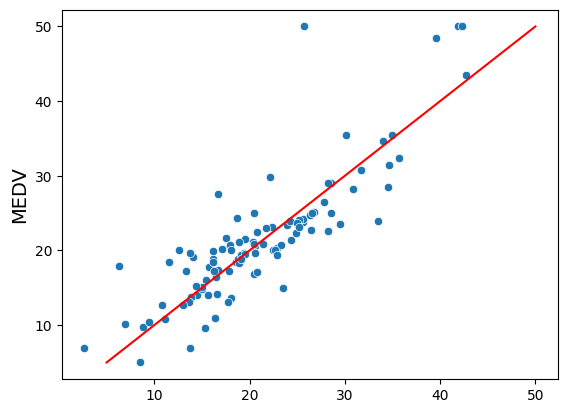

In [65]:
sns.scatterplot(x=predictions,y=y_test);
plt.plot([5,50],[5,50],'red')
plt.show()

In [66]:
pred_train = lm.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lm.score(X_train,y_train))

MAE train 3.2930492741093786
MSE train 19.914715096939034
RMSE train 4.4625906261877795
R2 train 0.7707616575582606


In [67]:
print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lm.score(X_test,y_test))

MAE test 3.01657703943713
MSE test 20.430649883762424
RMSE test 4.520027641924596
R2 test 0.7214019377795258


Rendimiento en TRAIN sin regularizar
- Error medio bajo y razonable
- 
- Error típico
- 77% de la variabilidad

Rendimiento en TEST
- mejor que en train" No overfitting
-
- Prácticamente igual al de train, estable
- 72% de la variabilidad en datos nunca vistoS


In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Modelo Ridge (regularizado)
ridgeR = Ridge(alpha=10)
ridgeR.fit(X_train, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [71]:
# Comparación
print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)), 2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)), 2))

print("Train MSE Ridge:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)), 2))
print("Test MSE Ridge:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)), 2))

Train MSE sin regularización: 19.91
Test MSE sin regularización: 20.43
Train MSE Ridge: 19.99
Test MSE Ridge: 20.48


9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

### Ridge

In [78]:
ridgeR = Ridge(alpha=50)
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)), 2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)), 2))

print("Train MSE Ridge:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)), 2))
print("Test MSE Ridge:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)), 2))

Train MSE sin regularización: 19.91
Test MSE sin regularización: 20.43
Train MSE Ridge: 20.94
Test MSE Ridge: 21.04


Ridge no hace nada, empeora

In [75]:
ridgeR = Ridge(alpha=3)
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)), 2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)), 2))

print("Train MSE Ridge:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)), 2))
print("Test MSE Ridge:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)), 2))

Train MSE sin regularización: 19.91
Test MSE sin regularización: 20.43
Train MSE Ridge: 19.92
Test MSE Ridge: 20.44


### Lasso

In [82]:
lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 19.91
Test MSE sin regularización: 20.43
Train MSE: 20.0769
Test MSE: 20.4709


In [83]:
lassoR = Lasso(alpha = 0.02) 
lassoR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE: 19.9212
Test MSE: 20.4190


### ElsasticNet

In [85]:
elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 23.9885
Test MSE: 22.6531


In [94]:
elastic_net = ElasticNet(alpha = 0.0001, l1_ratio=1)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 19.9147
Test MSE: 20.4306


10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?


Me quedo con el modelo lineal sin regularización.
- Es el que mejor generaliza (menor MSE en test)
- Es el más simple y más interpretable
- No presenta sobreajuste
- Las transformaciones aplicadas (log1p + escalado) ya estabilizan las relaciones entre variables
- La regularización no aporta mejoras porque el modelo ya está en equilibrio
